<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/ml_projects/DecisionTreeClassifierScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Classifier from Scratch (ID3 / CART style)
---

📚 THEORY (Hinglish Explanation)
---
* Tree splits data recursively on features

* Decision taken using criteria like:

* Entropy + Information Gain → ID3

* Gini Index → CART

Decision Tree using Gini (Simplified CART-style)
---


In [ ]:
import numpy as np
from collections import Counter

# ------------ Node class ------------

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # only for leaf

    def is_leaf_node(self):
        return self.value is not None

# ------------ Decision Tree ------------

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.n_classes = len(set(y))
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        num_labels = len(set(y))

        # stopping conditions
        if depth >= self.max_depth or num_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_feat, best_thresh = self._best_split(X, y, n_features)
        if best_feat is None:
            return Node(value=self._most_common_label(y))


        left_idx = X[:, best_feat] <= best_thresh
        right_idx = X[:, best_feat] > best_thresh


        left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(best_feat, best_thresh, left, right)


    def _best_split(self, X, y, n_features):
        best_gain = -1
        split_idx, split_thresh = None, None

        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                left_idx = X_column <= threshold
                right_idx = X_column > threshold
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                gain = self._gini_gain(y, left_idx, right_idx)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_thresh = threshold

        return split_idx, split_thresh


    def _gini_gain(self, y, left_idx, right_idx):
        def gini(y):
            counts = np.bincount(y)
            prob = counts / len(y)
            return 1 - np.sum(prob ** 2)

        parent_loss = gini(y)
        n = len(y)
        n_l, n_r = len(y[left_idx]), len(y[right_idx])

        if n_l == 0 or n_r == 0:
            return 0

        left_loss = gini(y[left_idx])
        right_loss = gini(y[right_idx])
        weighted_avg = (n_l / n) * left_loss + (n_r / n) * right_loss

        return parent_loss - weighted_avg

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]


    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def print_tree(self, node=None, depth=0):
        if node is None:
            node = self.root

        if node.is_leaf_node():
            print(f"{'  '*depth}Leaf → Predict: {node.value}")
        else:
            print(f"{'  '*depth}X[{node.feature}] <= {node.threshold:.3f}")
            self.print_tree(node.left, depth + 1)
            print(f"{'  '*depth}X[{node.feature}] > {node.threshold:.3f}")
            self.print_tree(node.right, depth + 1)

CODE EXPLANATION
---
* COUNTER- simple helper tool that count which label or items came how frequent

* we first made a class node - the point where we take decession
* Node class has paramter feature threshold left right and value
* feature - in which column we are taking decession
* threshold - in that column in which value  splitting is happening

* left , right : if feature work then left otherwise right
* value - agr leaf is node then   which class we should predict

 def is_leaf_node(self):
 return self.value is not None
* this function tells this node is making final decession or not

* decession treee class has paramter:
* max_depth - the depth of the tree
* min_samples_split - how much minimum samples for spliting
* fit function similar to model.fit() like function
* _build_tree  - Recursive tree grow
* this function makes tree starting from root * can we split more ?
* if no -- then make leaf
* if we can - then find the feature threshold and  divide tree in left and right

* stopping condition - if depth limit is crossed or only one class or few samples left then we cannt do split more

* then make direct leaf and store that class predition
* best split - this function decide which feature/column  and which threshold value
* Gini gain means and decresing the impurity
* the measure of gini impurity  if in one node only one class then  class is 100% pure
* if mix then purity is high

* Gain = parent impurity - (left + right impurity ka weighted average)Jitna zyada gain, utna accha split.

* most_common_label_count---majority vote



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Data load
data = load_breast_cancer()
X, y = data.data, data.target

# Normalize
sc = StandardScaler()
X = sc.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train
tree = DecisionTree(max_depth=5)
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (Decision Tree Scratch): {acc:.4f}")


Accuracy (Decision Tree Scratch): 0.9474


predicting and plotting on dattset
---

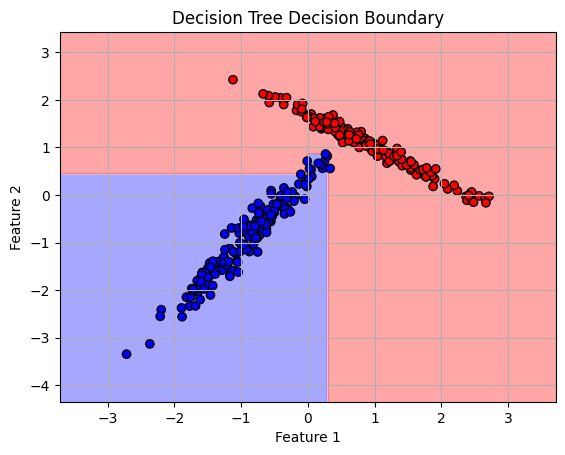

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X_vis, y_vis = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1)
tree_vis = DecisionTree(max_depth=3)
tree_vis.fit(X_vis, y_vis)

# Predict and plot decision regions
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title("Decision Tree Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_regions(X_vis, y_vis, tree_vis)


In [ ]:
tree.print_tree()


X[23] <= 0.000
  X[27] <= 0.690
    X[27] <= 0.247
      X[3] <= 0.110
        X[13] <= 0.187
          Leaf → Predict: 1
        X[13] > 0.187
          Leaf → Predict: 1
      X[3] > 0.110
        Leaf → Predict: 0
    X[27] > 0.247
      X[21] <= 0.258
        X[23] <= -0.124
          Leaf → Predict: 1
        X[23] > -0.124
          Leaf → Predict: 0
      X[21] > 0.258
        Leaf → Predict: 0
  X[27] > 0.690
    X[21] <= -0.405
      X[1] <= -0.868
        Leaf → Predict: 0
      X[1] > -0.868
        Leaf → Predict: 1
    X[21] > -0.405
      Leaf → Predict: 0
X[23] > 0.000
  X[6] <= -0.379
    X[1] <= -0.233
      Leaf → Predict: 1
    X[1] > -0.233
      X[4] <= -1.559
        Leaf → Predict: 1
      X[4] > -1.559
        Leaf → Predict: 0
  X[6] > -0.379
    Leaf → Predict: 0


DECESSION TREE USING ID3
---
* GINI + ENTROPY


In [15]:
#importing libraries
import numpy as np
from collections import Counter

NODE CLASS
---

In [17]:
# making deecession tree using id3
class node:
  def __init__(self,threshold,left,right,*,value):
    self.threshold=threshold
    self.left=left
    self.right=right
    self.value=value
  def is_leaf_node(self):
   return self.value is not None



ID3 TREE
---

In [19]:
class ID3DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.n_classes = len(set(y))
        self.root = self._build_tree(X, y)

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _information_gain(self, y, left_idx, right_idx):
        parent_entropy = self._entropy(y)
        n = len(y)
        n_l, n_r = len(left_idx), len(right_idx)

        if n_l == 0 or n_r == 0:
            return 0

        e_l = self._entropy(y[left_idx])
        e_r = self._entropy(y[right_idx])
        weighted_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        return parent_entropy - weighted_entropy

    def _best_split(self, X, y):
        best_gain = -1
        best_feat, best_thresh = None, None

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for thresh in thresholds:
                left_idx = np.where(X[:, feature_idx] <= thresh)[0]
                right_idx = np.where(X[:, feature_idx] > thresh)[0]
                gain = self._information_gain(y, left_idx, right_idx)

                if gain > best_gain:
                    best_gain = gain
                    best_feat = feature_idx
                    best_thresh = thresh
        return best_feat, best_thresh

    def _most_common_label(self, y):
        return Counter(y).most_common(1)[0][0]

    def _build_tree(self, X, y, depth=0):
        if depth >= self.max_depth or len(set(y)) == 1:
            return Node(value=self._most_common_label(y))

        feat, thresh = self._best_split(X, y)
        if feat is None:
            return Node(value=self._most_common_label(y))

        left_idx = np.where(X[:, feat] <= thresh)[0]
        right_idx = np.where(X[:, feat] > thresh)[0]

        left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(feature=feat, threshold=thresh, left=left, right=right)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def print_tree(self, node=None, depth=0):
        if node is None:
            node = self.root
        if node.is_leaf_node():
            print(f"{'  '*depth}Predict: {node.value}")
        else:
            print(f"{'  '*depth}X[{node.feature}] <= {node.threshold:.3f}")
            self.print_tree(node.left, depth + 1)
            print(f"{'  '*depth}X[{node.feature}] > {node.threshold:.3f}")
            self.print_tree(node.right, depth + 1)


Visulisation
---

In [20]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tree = ID3DecisionTree(max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9833333333333333


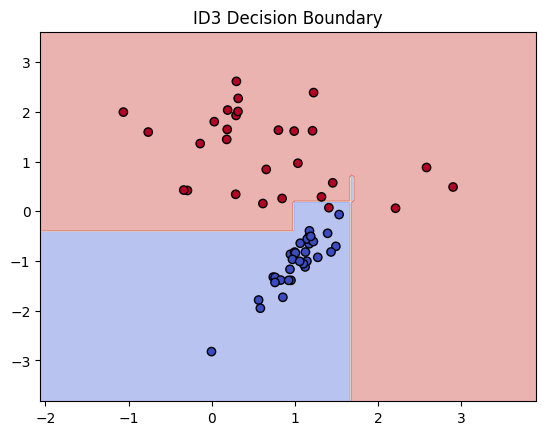

X[1] <= 0.189
  X[0] <= 1.659
    X[1] <= -0.409
      X[0] <= 0.960
        Predict: 0
      X[0] > 0.960
        X[0] <= 0.964
          Predict: 1
        X[0] > 0.964
          Predict: 0
    X[1] > -0.409
      X[0] <= 1.336
        X[0] <= 0.970
          Predict: 1
        X[0] > 0.970
          Predict: 0
      X[0] > 1.336
        Predict: 0
  X[0] > 1.659
    Predict: 1
X[1] > 0.189
  X[1] <= 0.721
    X[1] <= 0.713
      X[0] <= 1.669
        Predict: 1
      X[0] > 1.669
        X[0] <= 1.687
          Predict: 0
        X[0] > 1.687
          Predict: 1
    X[1] > 0.713
      Predict: 0
  X[1] > 0.721
    Predict: 1


In [21]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title("ID3 Decision Boundary")
    plt.show()

plot_decision_boundary(X_test, y_test, tree)
tree.print_tree()
